In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
spam=pd.read_csv("Spam_lms.csv",encoding='windows-1252')

In [11]:
spam.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam.shape

(116, 2)

In [15]:
spam.isnull().sum()

type    0
text    0
dtype: int64

In [17]:
spam.type.value_counts()

ham     98
spam    18
Name: type, dtype: int64

C:\Users\Ratnesh\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

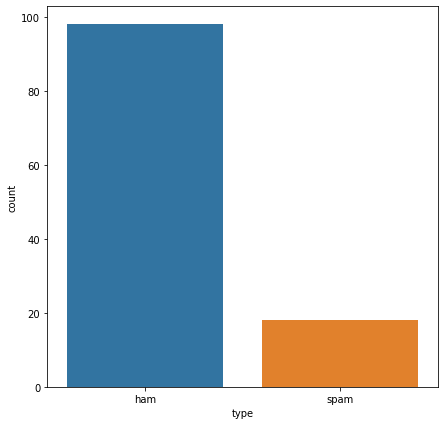

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(spam.type)

In [23]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [24]:
lm=WordNetLemmatizer()
corpus=[]

In [28]:
for i in range(len(spam)):
    review=re.sub('[^a-zA-Z]',' ',spam['text'][i])
    review=review.lower()
    review=review.split()
    review=[lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [29]:
corpus[:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(corpus).toarray()

In [31]:
x[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y=pd.get_dummies(spam['type'],drop_first=True)

In [33]:
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
lr=LogisticRegression()
sv=SVC()
gb=GaussianNB()
mb=MultinomialNB()
kn=KNeighborsClassifier(n_neighbors=2)
sv_poly=SVC(kernel='poly')
tree=DecisionTreeClassifier(random_state=0)

In [69]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_lr = []
lst_accu_stratified_sv = []
lst_accu_stratified_gb = []
lst_accu_stratified_mb = []
lst_accu_stratified_kn = []
lst_accu_stratified_sv_poly = []
lst_accu_stratified_tree = []
   
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    sv.fit(x_train_fold, y_train_fold)
    gb.fit(x_train_fold, y_train_fold)
    mb.fit(x_train_fold, y_train_fold)
    kn.fit(x_train_fold, y_train_fold)
    sv_poly.fit(x_train_fold, y_train_fold)
    tree.fit(x_train_fold, y_train_fold)
    lst_accu_stratified_lr.append(lr.score(x_test_fold, y_test_fold))
    lst_accu_stratified_sv.append(sv.score(x_test_fold, y_test_fold))
    lst_accu_stratified_gb.append(gb.score(x_test_fold, y_test_fold))
    lst_accu_stratified_mb.append(mb.score(x_test_fold, y_test_fold))
    lst_accu_stratified_kn.append(kn.score(x_test_fold, y_test_fold))
    lst_accu_stratified_tree.append(kn.score(x_test_fold, y_test_fold))
    lst_accu_stratified_sv_poly.append(sv_poly.score(x_test_fold, y_test_fold))

C:\Users\Ratnesh\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ratnesh\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ratnesh\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ratnesh\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

# Logistic Regression

In [43]:
print('List of possible accuracy:', lst_accu_stratified_lr)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_lr)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_lr)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_lr)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified_lr))

List of possible accuracy: [0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.8181818181818182]

Maximum Accuracy That can be obtained from this model is: 90.9090909090909 %

Minimum Accuracy: 81.81818181818183 %

Overall Accuracy: 84.54545454545455 %

Standard Deviation is: 0.03235478258191304


# SVM

In [44]:
print('List of possible accuracy:', lst_accu_stratified_sv)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_sv)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_sv)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_sv)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified_sv))

List of possible accuracy: [0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.8181818181818182]

Maximum Accuracy That can be obtained from this model is: 90.9090909090909 %

Minimum Accuracy: 81.81818181818183 %

Overall Accuracy: 84.54545454545455 %

Standard Deviation is: 0.03235478258191304


# GB

In [45]:
print('List of possible accuracy:', lst_accu_stratified_gb)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_gb)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_gb)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_gb)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified_gb))

List of possible accuracy: [0.75, 0.8333333333333334, 0.75, 0.6666666666666666, 0.5833333333333334, 0.75, 0.6363636363636364, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182]

Maximum Accuracy That can be obtained from this model is: 90.9090909090909 %

Minimum Accuracy: 58.333333333333336 %

Overall Accuracy: 76.06060606060606 %

Standard Deviation is: 0.10427060929748638


# MB

In [46]:
print('List of possible accuracy:', lst_accu_stratified_mb)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_mb)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_mb)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_mb)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified_mb))

List of possible accuracy: [0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.8181818181818182]

Maximum Accuracy That can be obtained from this model is: 90.9090909090909 %

Minimum Accuracy: 81.81818181818183 %

Overall Accuracy: 84.54545454545455 %

Standard Deviation is: 0.03235478258191304


# KNN

In [65]:
print('List of possible accuracy:', lst_accu_stratified_kn)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_kn)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_kn)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_kn)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified_kn))

List of possible accuracy: [0.9166666666666666, 0.9166666666666666, 1.0, 0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 83.33333333333334 %

Overall Accuracy: 91.36363636363635 %

Standard Deviation is: 0.03745214271002507


# SVM(poly)

In [66]:
print('List of possible accuracy:', lst_accu_stratified_sv_poly)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_sv_poly)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_sv_poly)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_sv_poly)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified_sv_poly))

List of possible accuracy: [0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.9090909090909091, 0.9090909090909091, 0.8181818181818182, 0.8181818181818182]

Maximum Accuracy That can be obtained from this model is: 90.9090909090909 %

Minimum Accuracy: 81.81818181818183 %

Overall Accuracy: 84.54545454545455 %

Standard Deviation is: 0.03235478258191304


# Decision Tree 

In [70]:
print('List of possible accuracy:', lst_accu_stratified_tree)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_tree)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_tree)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_tree)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified_tree))

List of possible accuracy: [0.9166666666666666, 0.9166666666666666, 1.0, 0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 83.33333333333334 %

Overall Accuracy: 91.36363636363635 %

Standard Deviation is: 0.03745214271002507
